In [82]:
import numpy as np
import matplotlib.pyplot as plt

import glob

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#custom functions
from helpers import*
%matplotlib inline

In [2]:
forest_data_path = glob.glob("data/forest/*")
tallbuilding_data_path = glob.glob("data/tallbuilding/*")
highway_data_path = glob.glob("data/highway/*")

In [3]:
def modify_x(X, rowsize=36):
    temp_X = []
    for img_index in range(X.shape[0]//rowsize):
        temp_X.append((X[rowsize*img_index:rowsize*(img_index+1)]).sum(axis=0))
    return np.array(temp_X).reshape(-1,23)


In [28]:
cA = []
for item in forest_data_path:
    cA.append(np.loadtxt(item))

cB = []
for item in tallbuilding_data_path:
    cB.append(np.loadtxt(item))
    
cC = []
for item in highway_data_path:
    cC.append(np.loadtxt(item))
    
# cA = modify_x(np.array(cA))
# cB = modify_x(np.array(cB))
# cC = modify_x(np.array(cC))

cA = (np.array(cA))
cB = (np.array(cB))
cC = (np.array(cC))

cA_train,cA_test = train_test_split(cA, test_size=0.3, random_state=42)
cB_train,cB_test = train_test_split(cB, test_size=0.3, random_state=42) 
cC_train,cC_test = train_test_split(cC, test_size=0.3, random_state=42) 

In [29]:
XA = cA_train.reshape(-1,23)
XB = cB_train.reshape(-1,23)
XC = cC_train.reshape(-1,23)

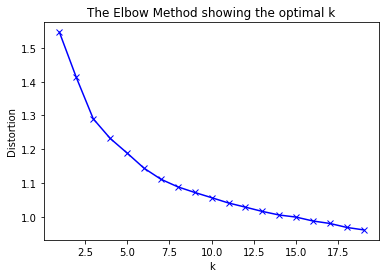

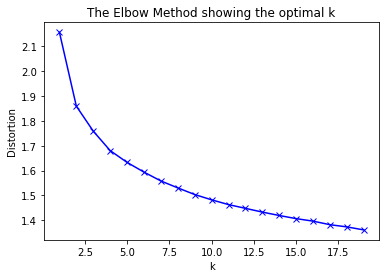

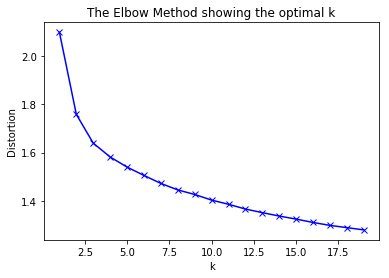

In [30]:
plot_elbow(XA, 20)
plot_elbow(XB, 20)
plot_elbow(XC, 20)

### Applying PCA to data

[  42.45   50.17   56.2    61.8    66.92   71.41   75.3    79.14   82.63
   85.69   88.29   90.55   92.63   94.39   95.76   97.01   97.98   98.7
   99.38   99.85   99.99  100.    100.  ]


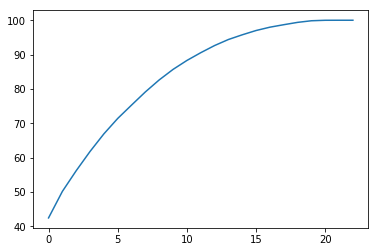

[ 35.99  47.59  54.39  60.26  65.16  69.53  73.72  77.61  81.34  84.39
  87.23  89.75  92.2   94.34  96.14  97.52  98.46  99.02  99.49  99.87
  99.97  99.98  99.98]


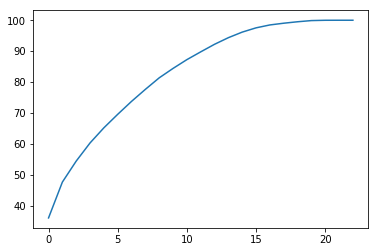

[  35.61   47.69   54.57   59.85   65.03   69.55   73.88   77.81   81.53
   84.94   88.03   90.61   92.84   94.64   96.27   97.62   98.41   99.02
   99.49   99.89   99.97  100.    100.  ]


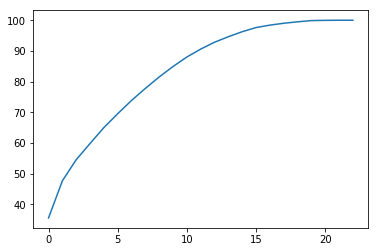

In [31]:
def pca_x(X):
    X = scale(X)
    pca = PCA(n_components=23)
    pca.fit(X)

    #The amount of variance that each PC explains
    var= pca.explained_variance_ratio_

    #Cumulative Variance explains
    var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

    print(var1)
    plt.plot(var1)
    plt.show()
    
pca_x(XA)
pca_x(XB)
pca_x(XC)

In [32]:
def transform_x(X,n=6):
    pca = PCA(n_components=n)
    pca.fit(X)
    return pca.fit_transform(X)

X1A = transform_x(XA)
X1B = transform_x(XB)
X1C = transform_x(XC)

In [33]:
# X1A = XA
# X1B = XB
# X1C = XC

(8244, 6)

In [34]:
#A 40, #B 40, #C 40
gA_new = pipeline(X1A, K=10, error=10**-3)
gB_new = pipeline(X1B, K=10, error=10**-3)
gC_new = pipeline(X1C, K=10, error=10**-3)

[ 803.96185983]
[ 803.96185983]
[ 284.00698767]
[ 143.89455153]
[ 93.36454278]
[ 66.039953]
[ 47.78369223]
[ 34.81678005]
Iterations : 8
[ 1008.3000629]
[ 1008.3000629]
[ 394.19667026]
[ 234.39427966]
[ 159.17191407]
[ 116.93064852]
[ 93.88311173]
[ 81.35507162]
[ 69.69325304]
Iterations : 9
[ 587.98530056]
[ 587.98530056]
[ 230.57759643]
[ 137.88646531]
[ 97.77043904]
[ 75.20538484]
[ 60.69261601]
[ 50.83721574]
[ 43.662128]
Iterations : 9


In [57]:
def vote_class(img_f):
    votes_A = 0
    votes_B = 0
    votes_C = 0
    for row in img_f:
        temp = classify_scores(gA_new, gB_new, gC_new, row)
        if temp==1:
            votes_A+=1
        elif temp==2:
            votes_B+=1
        else:
            votes_C+=1
    temp = (votes_A, votes_B, votes_C)
    if max(temp) == votes_A:
        return 1
    elif max(temp) == votes_B:
        return 2
    else:
        return 3

def count_classification2(X, dominant_feature_size = 6):
    count_A = 0
    count_B = 0
    count_C = 0
    X = X.reshape(-1,36,dominant_feature_size)
    for i in range(X.shape[0]):
        if 1==vote_class(X[i]):
            count_A+=1
        elif 2==vote_class(X[i]):
            count_B+=1   
        else:
            count_C+=1

    print(count_A, count_B, count_C)
    return (count_A, count_B, count_C)

In [73]:
pca_n = 6

print('Train')
mem_train = []
mem_train.append(count_classification2(transform_x(cA_train.reshape(-1,23)).reshape(-1,36,pca_n)))
mem_train.append(count_classification2(transform_x(cB_train.reshape(-1,23)).reshape(-1,36,pca_n)))
mem_train.append(count_classification2(transform_x(cC_train.reshape(-1,23)).reshape(-1,36,pca_n)))
mem_train = np.array(mem_train)

print('Test')
mem_test =[]
mem_test.append(count_classification2(transform_x(cA_test.reshape(-1,23)).reshape(-1,36,pca_n)))
mem_test.append(count_classification2(transform_x(cB_test.reshape(-1,23)).reshape(-1,36,pca_n)))
mem_test.append(count_classification2(transform_x(cC_test.reshape(-1,23)).reshape(-1,36,pca_n)))
mem_test = np.array(mem_test)

Train
229 0 0
15 208 26
7 5 170
Test
99 0 0
7 90 10
5 23 50


In [74]:
def acc(mem):
    return (mem[0][0]+mem[1][1]+mem[2][2])/sum(mem.sum(axis=1))

print("Train Accuracy : ",acc(mem_train))
print("Test Accuracy : ",acc(mem_test))

Train Accuracy :  0.919696969697
Test Accuracy :  0.841549295775


In [71]:
def class_scores(gmm, img_features):
    return gmm.predict_scores(img_features)

def classify(gA, gB, gC, img_feature):
    if class_scores(gA, img_feature) > max(class_scores(gB, img_feature), class_scores(gC, img_feature)):
        return 1
    elif class_scores(gB, img_feature) > max(class_scores(gA, img_feature), class_scores(gC, img_feature)):
        return 2
    else:
        return 3
    
def classify_scores(gA, gB, gC, img_feature):
    if class_scores(gA, img_feature) > max(class_scores(gB, img_feature), class_scores(gC, img_feature)):
        return 1
    elif class_scores(gB, img_feature) > max(class_scores(gA, img_feature), class_scores(gC, img_feature)):
        return 2
    else:
        return 3
    
def get_scores(gA, gB, gC, img_feature):
    return (np.mean(class_scores(gA, img_feature)), np.mean(class_scores(gB, img_feature)), np.mean(class_scores(gC, img_feature)))


In [72]:
#row_size :len of row size in entropy file
def count_classification(X, row_size=36):
    count_A = 0
    count_B = 0
    count_C = 0

    for i in range(X.shape[0]):
        if 1==classify(gA_new, gB_new, gC_new, X[i]):
            count_A+=1
        elif 2==classify(gA_new, gB_new, gC_new, X[i]):
            count_B+=1   
        else:
            count_C+=1

    print(count_A, count_B, count_C)
    return (count_A, count_B, count_C)

def build_scores(X, row_size=36):
    scores = np.empty((X.shape[0],3))
    for i in range(X.shape[0]):
        scores[i] = get_scores(gA_new, gB_new, gC_new, X[i])
    return scores



In [16]:
# ROC Curve
def roc(no_of_classes, actualValues, score ):

    no_of_test_points = actualValues.shape[0]
    #no_of_classes = 3
    
    TPR = []
    FPR = []
    t = []

    for threshold in np.arange(0, 1, 0.0001):
        t.append(threshold)
        TP = 0
        FP = 0
        FN = 0
        TN = 0
        for i in range(0, no_of_test_points):
            for j in range(0, no_of_classes):
                if actualValues[i] == j+1:
                    if score[i][j] >= threshold:  
                        TP = TP+1
                    elif score[i][j] < threshold:
                        FN = FN+1
                else:
                    if score[i][j] >= threshold:
                        FP = FP+1
                    elif score[i][j] < threshold:
                        TN = TN+1
        tpr = TP / (TP + FN)  
        fpr = FP / (FP + TN)
        TPR.append(tpr)
        FPR.append(fpr)
        #roc_auc.append(auc(fpr, tpr))
    rocPlot(FPR, TPR)
    
def rocPlot(FPR, TPR):

    plt.figure()
    lw = 2
    plt.plot(FPR, TPR, color='darkorange', lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    

In [75]:
actualLabels = np.array([1]*X1A_test.shape[0]+[2]*X1B_test.shape[0]+[3]*X1C_test.shape[0]).reshape(-1,1)
predicted_scores = np.vstack((build_scores(transform_x(cA_test.reshape(-1,23)).reshape(-1,36,pca_n)), build_scores(transform_x(cB_test.reshape(-1,23)).reshape(-1,36,pca_n)), build_scores(transform_x(cC_test.reshape(-1,23)).reshape(-1,36,pca_n))))

In [77]:
def normalize(X):
    return (X-min(X))/(max(X)-min(X))

temp_scores = predicted_scores
for i in range(3):
    temp_scores[:,i] = normalize(temp_scores[:,i])

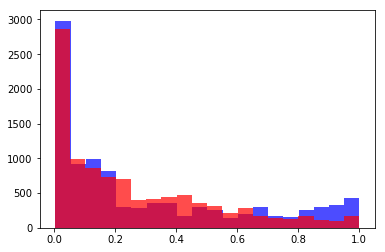

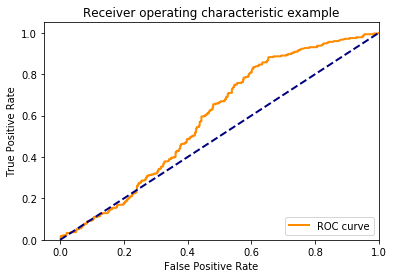

In [79]:
roc(3, actualLabels, predicted_scores )